In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart disease classification dataset.csv to heart disease classification dataset.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

In [96]:
data = pd.read_csv('heart disease classification dataset.csv')
data=data.drop('index', axis=1) # Edited the first column header and added index as header name so that I can drop that f ing column

impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

impute.fit(data[['trestbps']])
impute.fit(data[['chol']])
impute.fit(data[['thalach']])

data['trestbps'] = impute.transform(data[['trestbps']])
data['chol'] = impute.transform(data[['chol']])
data['thalach'] = impute.transform(data[['thalach']])

X = data.iloc[:,2:13]
y = data.iloc[:,13]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
detAcc=accuracy_score(y_pred,y_test)*100
print("Decision Tree Test Accuracy: " + str(detAcc) +" %")

Decision Tree Test Accuracy: 86.88524590163934 %


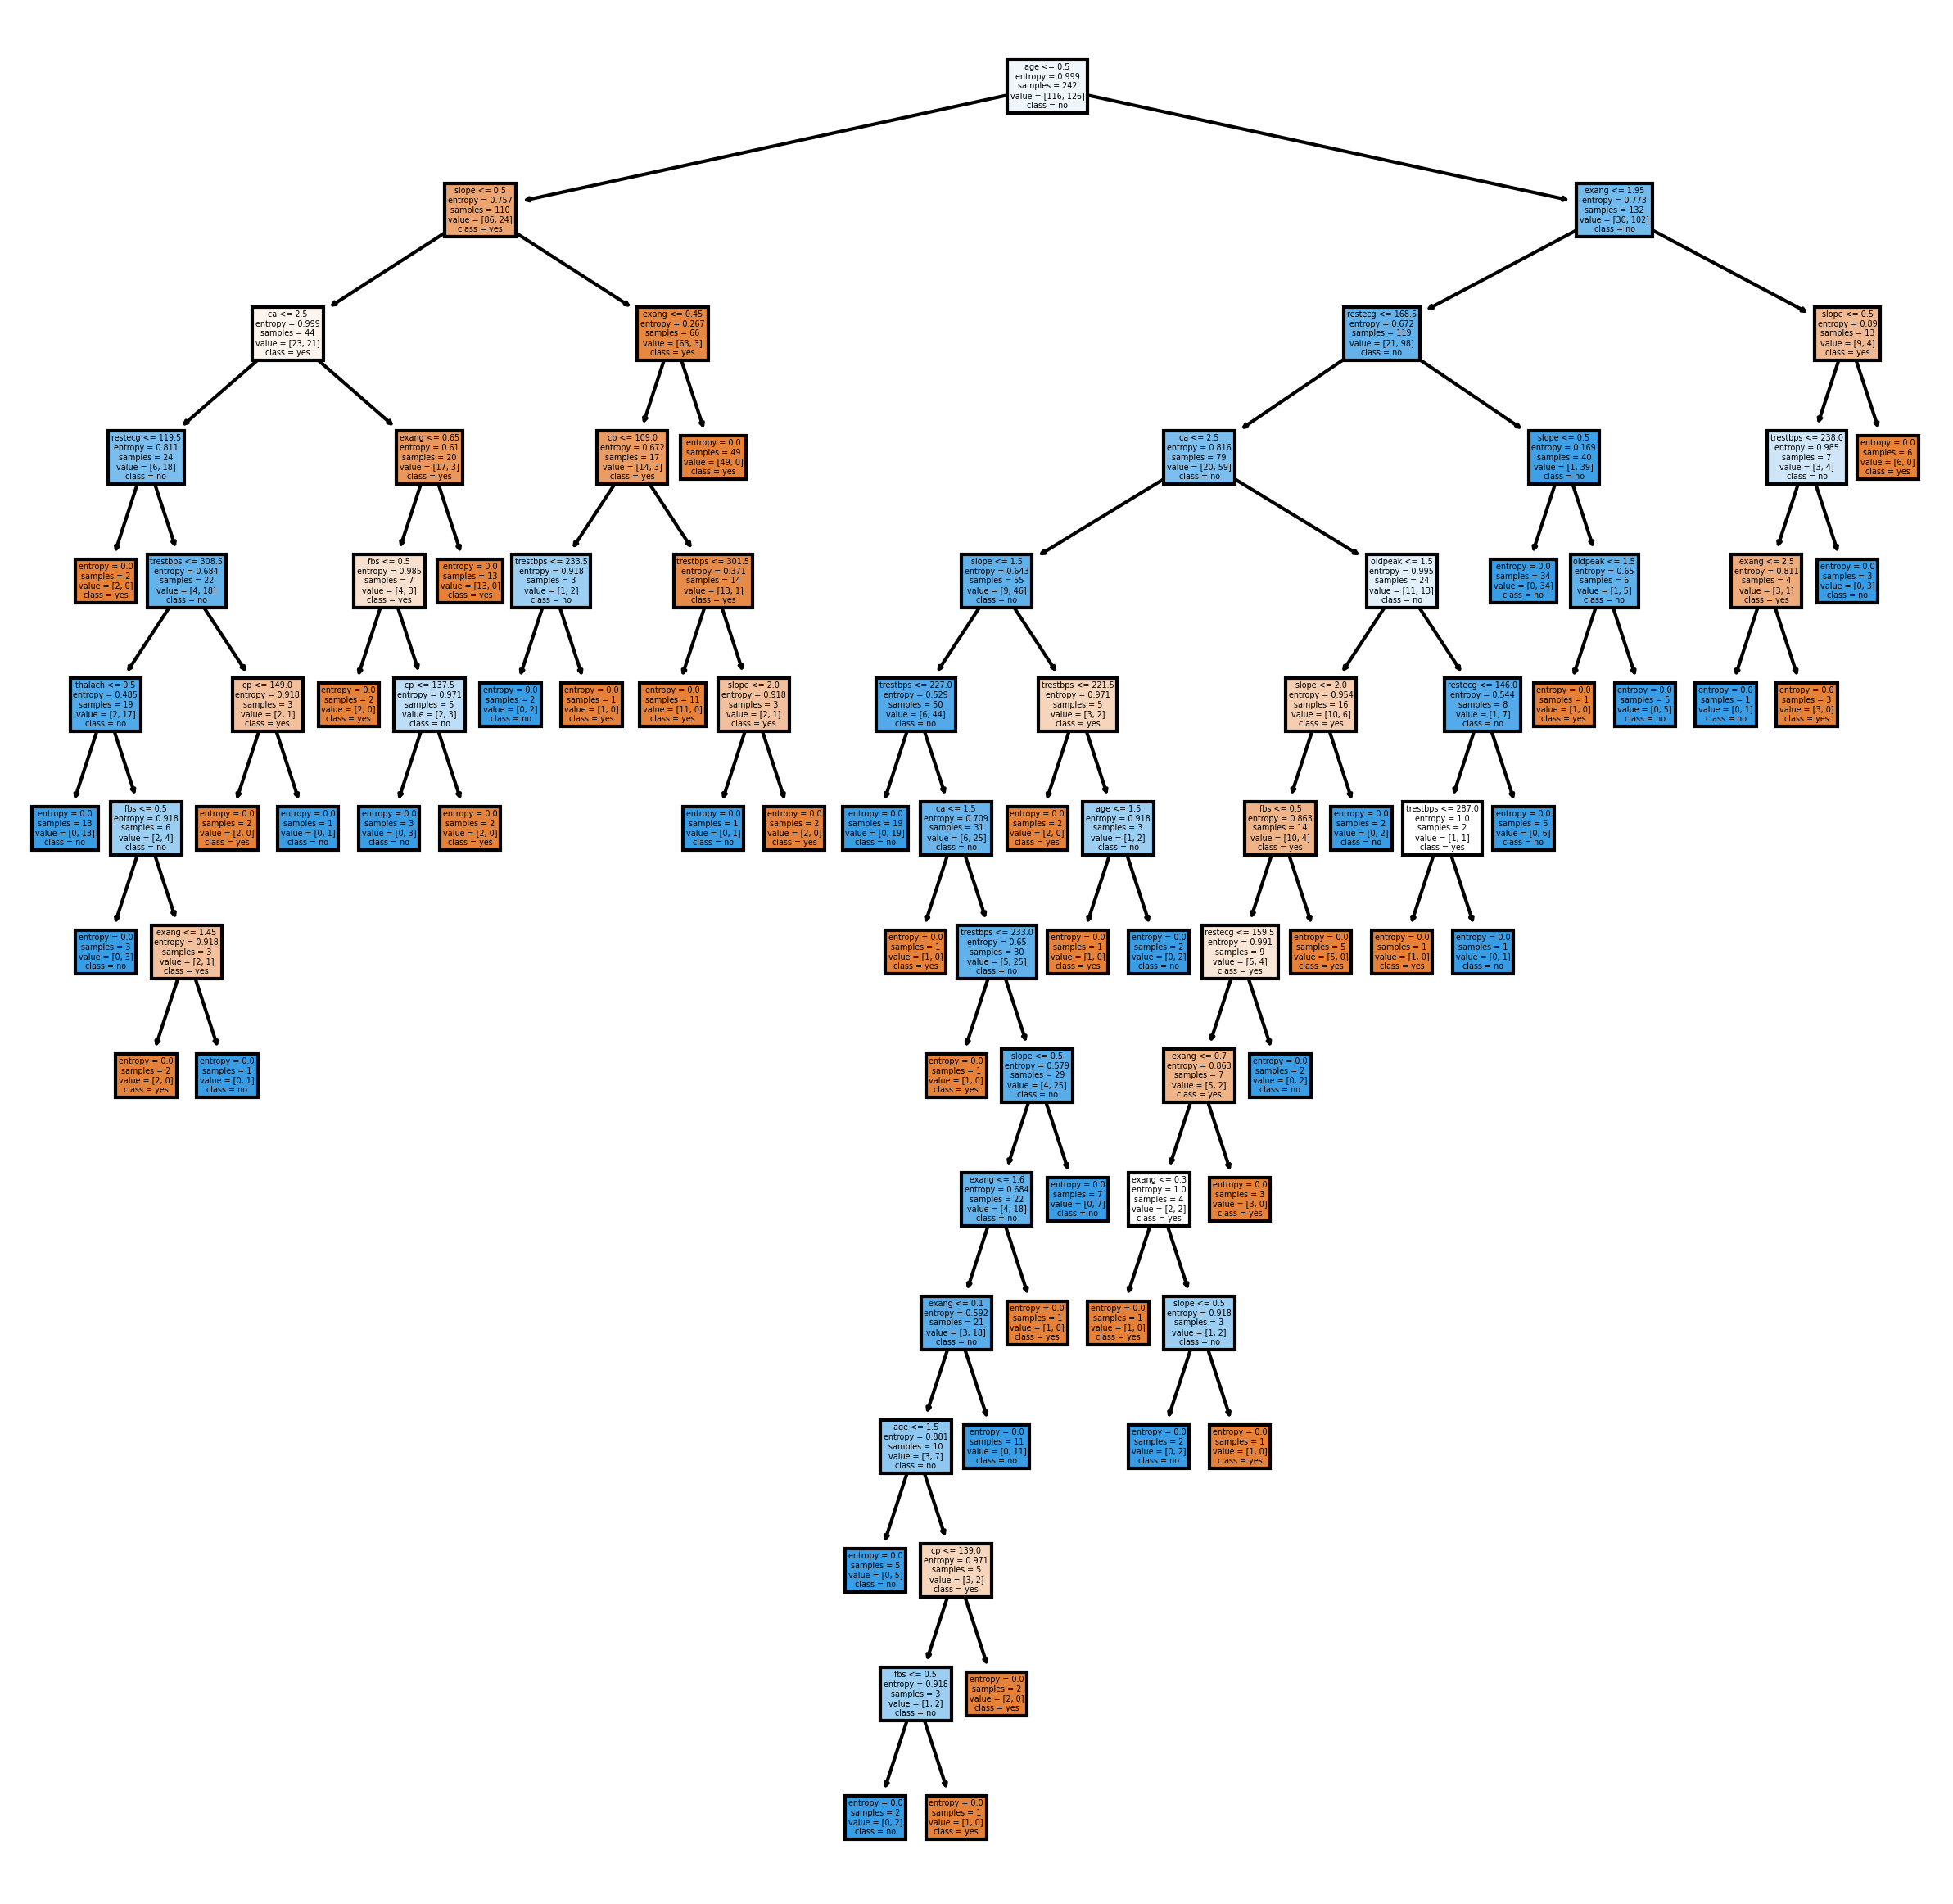

In [77]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(clf, feature_names = X.columns, class_names=['yes','no'], filled = True);

In [93]:
data = pd.read_csv('heart disease classification dataset.csv')
data=data.drop('index', axis=1)
data=data.drop('sex', axis=1)

#Prepare the training set
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

impute.fit(data[['trestbps']])
impute.fit(data[['chol']])
impute.fit(data[['thalach']])

data['trestbps'] = impute.transform(data[['trestbps']])
data['chol'] = impute.transform(data[['chol']])
data['thalach'] = impute.transform(data[['thalach']])

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]


#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


#Train the model
model = LogisticRegression(solver='lbfgs', max_iter=750)
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)
#print(predictions)# printing predictions

regAcc=accuracy_score(y_test, predictions) * 100
print( "Logistic Regression Test Accuracy: " + str(regAcc) +" %" )

Logistic Regression Test Accuracy: 91.80327868852459 %


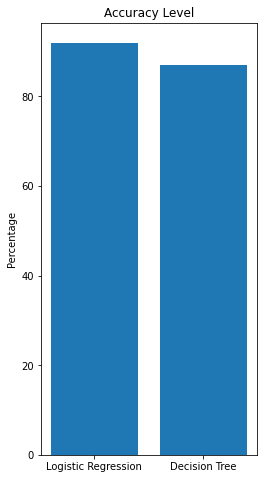

In [106]:
fig = plt.figure()
ax = fig.add_axes([0,0,.5,1.5])
method = ['Logistic Regression', 'Decision Tree']
percentage = [regAcc, detAcc]
ax.bar(method,percentage)
plt.ylabel('Percentage')
plt.title('Accuracy Level')
plt.show()